In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib.font_manager as fm
path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

In [3]:
# 연령, 성별 에 따른 도서 대출 분석

In [4]:
df_gender = pd.read_excel('gender.xlsx')
print(df_gender.shape)
df_gender.head()

(2000, 11)


,순위,서명,저자,출판사,출판년도,권,ISBN,ISBN부가기호,KDC,대출건수,sep
0,1,천년의 질문 :조정래 장편소설,저자: 조정래,해냄,2019,1.0,9788965746829,4810.0,813.62,2566,남성
1,2,(추리 천재) 엉덩이 탐정,트롤 글·그림 ;김정화 옮김,미래엔,2016-2020,7.0,9791162339466,74830.0,833.60,2525,남성
2,3,추리 천재 엉덩이 탐정 5 - 유적에서 날아온 SOS 사건,트롤,아이세움,2017,5.0,9791162332542,NaN,NaN,2497,남성
3,4,(추리 천재) 엉덩이 탐정,트롤 글·그림 ;김정화 옮김,미래엔,2016-2020,4.0,9788937848247,74830.0,833.60,2425,남성
4,5,(추리 천재) 엉덩이 탐정,트롤 글·그림 ;김정화 옮김,미래엔,2016-2020,3.0,9788937889714,74830.0,833.60,2393,남성


In [5]:
df_generation = pd.read_excel('generation.xlsx')
print(df_generation.shape)
df_generation.head()

(9000, 11)


,순위,서명,저자,출판사,출판년도,권,ISBN,ISBN부가기호,KDC,대출건수,sep
0,1,수박 수영장 :안녕달 그림책,지은이: 안녕달,창비,2015,NaN,9788936446819,77810.0,813.7,373,영유아
1,2,할머니의 여름휴가,안녕달,창비,2016,NaN,9788936454951,NaN,NaN,283,영유아
2,3,오싹오싹 팬티!,글: 에런 레이놀즈 ;옮김: 홍연미,토토북,2018,NaN,9788964963678,77840.0,843.0,247,영유아
3,4,바다 100층짜리 집,글·그림: 이와이 도시오 ;옮김: 김숙,북뱅크,2014,NaN,9788966350278,74830.0,833.6,240,영유아
4,5,하늘 100층짜리 집,글·그림: 이와이 도시오 ;옮김: 김숙,북뱅크,2017,NaN,9788966350759,74830.0,833.6,235,영유아


In [6]:
df_Bygender = pd.pivot_table(df_gender, index=['서명','ISBN'], columns='sep', values = '대출건수').fillna(0)
df_Bygender = df_Bygender.reset_index()
df_Bygender

sep,서명,ISBN,남성,여성
0,(10대를 위한) 정의란 무엇인가 :하버드대 마이클 샌델 교수의 정의 수업,9788937886966,612.0,1145.0
1,"(1일 1페이지, 세상에서 가장 짧은) 교양 수업 365",9791190305679,990.0,1897.0
2,(50대 사건으로 보는) 돈의 역사 =The history of money,9791135422225,1728.0,1703.0
3,(Charlie IX & Dodo) 찰리 9세,9788965462651,592.0,970.0
4,(趙廷來 大河小說) 太白山脈,9788973377947,965.0,0.0
...,...,...,...,...
1260,흔한남매,9791164131686,1528.0,3150.0
1261,흔한남매,9791164132454,1565.0,3079.0
1262,흔한남매,9791164134267,1211.0,2512.0
1263,흔한남매,9791164134847,744.0,1500.0


In [7]:
gender = df_Bygender.sum(axis=0)
gender = pd.DataFrame(gender).reset_index()
gender = gender.iloc[2:,:]
gender[0] = gender[0].astype('float64')
gender

,sep,0
2,남성,842586.0
3,여성,1465665.5


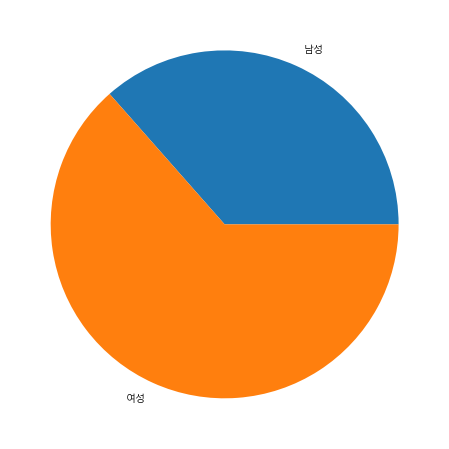

In [8]:
plt.figure(figsize=(8,8))
plt.pie(gender[0], labels = gender['sep'])
plt.show()

In [9]:
df_Bygeneration = pd.pivot_table(df_generation, index=['서명','ISBN'], columns='sep', values = '대출건수').fillna(0)
df_Bygeneration = df_Bygeneration.reset_index()
df_Bygeneration = df_Bygeneration.reindex(columns=['서명','ISBN','영유아','유아','초등','청소년','20대','30대','40대','50대','60대'])
df_Bygeneration

sep,서명,ISBN,영유아,유아,초등,청소년,20대,30대,40대,50대,60대
0,'초등 2학년' 평생 공부 습관을 '완성'하라 :내 아이를 공부에 길들일 결정적 시...,9791186117446,0.0,0.0,0.0,0.0,0.0,365.0,0.0,0.0,0.0
1,(0세부터 시작하는) 감정조절 훈육법 :언제 어떻게 시작해야 할지 고민인 부모를 위...,9788968331718,0.0,0.0,0.0,0.0,0.0,505.0,0.0,0.0,0.0
2,(10년 후에도 변하지 않을) 부동산 투자의 정석,9788952777638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,137.0,0.0
3,(10대를 위한) 정의란 무엇인가 :하버드대 마이클 샌델 교수의 정의 수업,9788937886966,0.0,0.0,0.0,351.0,0.0,0.0,799.0,135.0,0.0
4,(10대와 통하는) 환경과 생태 이야기,9788993463835,0.0,0.0,0.0,138.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4507,희망 버리기 기술 :엉망진창인 세상에서 흔들리지 않고 나아가는 힘,9788901235158,0.0,0.0,0.0,0.0,140.0,0.0,0.0,130.0,0.0
4508,흰 :한강 소설,9788954640718,0.0,0.0,0.0,123.0,273.0,0.0,0.0,126.0,0.0
4509,히틀러의 음식을 먹는 여자들,9788931021059,0.0,0.0,0.0,0.0,123.0,0.0,0.0,0.0,0.0
4510,힘 빼기의 기술 :카피라이터 김하나의 유연한 일상,9788952778901,0.0,0.0,0.0,0.0,194.0,0.0,0.0,0.0,0.0


In [10]:
generation = df_Bygeneration.sum(axis=0)
generation = pd.DataFrame(generation).reset_index()
generation = generation.iloc[2:,:]
generation

,sep,0
2,영유아,73191.5
3,유아,123485
4,초등,658194
5,청소년,176520
6,20대,269524
7,30대,486010
8,40대,830274
9,50대,227490
10,60대,134852


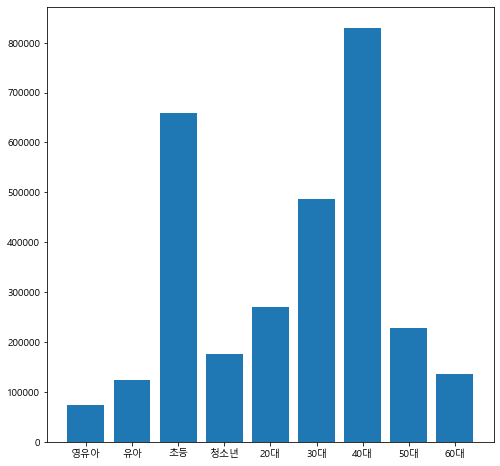

In [11]:
plt.figure(figsize=(8,8))
plt.bar(generation['sep'],generation[0])
plt.show()

In [12]:
# 성인 / 비성인 도서대출 분석

In [13]:
df_Bygeneration.columns

Index(['서명', 'ISBN', '영유아', '유아', '초등', '청소년', '20대', '30대', '40대', '50대',
       '60대'],
      dtype='object', name='sep')

In [14]:
kids = df_Bygeneration.loc[:,['서명', 'ISBN', '영유아', '유아', '초등', '청소년']]
kids['total'] = kids[['영유아', '유아', '초등', '청소년']].sum(axis=1) 
kids = kids[kids['total']!=0]
kids

sep,서명,ISBN,영유아,유아,초등,청소년,total
3,(10대를 위한) 정의란 무엇인가 :하버드대 마이클 샌델 교수의 정의 수업,9788937886966,0.0,0.0,0.0,351.0,351.0
4,(10대와 통하는) 환경과 생태 이야기,9788993463835,0.0,0.0,0.0,138.0,138.0
5,"(1일 1페이지, 세상에서 가장 짧은) 교양 수업 365",9791190305679,0.0,0.0,0.0,113.0,113.0
7,(50대 사건으로 보는) 돈의 역사 =The history of money,9791135422225,0.0,0.0,0.0,159.0,159.0
8,(Charlie IX & Dodo) 찰리 9세,9788965462651,0.0,0.0,569.0,0.0,569.0
...,...,...,...,...,...,...,...
4502,흔한남매,9791164134847,0.0,104.0,732.0,0.0,836.0
4503,흔한남매 안 흔한 일기 1,9791164134649,0.0,0.0,546.0,0.0,546.0
4504,"흥, 내 맘이야!",9788949105161,56.0,0.0,0.0,0.0,56.0
4505,흥칫뿡,9788932374789,57.0,97.0,0.0,0.0,154.0


In [15]:
adults = df_Bygeneration.loc[:,['서명', 'ISBN', '20대', '30대', '40대', '50대','60대']]
adults['total'] = adults[['20대', '30대', '40대', '50대','60대']].sum(axis=1) 

In [16]:
adults = adults[adults['total']!=0]
adults

sep,서명,ISBN,20대,30대,40대,50대,60대,total
0,'초등 2학년' 평생 공부 습관을 '완성'하라 :내 아이를 공부에 길들일 결정적 시...,9791186117446,0.0,365.0,0.0,0.0,0.0,365.0
1,(0세부터 시작하는) 감정조절 훈육법 :언제 어떻게 시작해야 할지 고민인 부모를 위...,9788968331718,0.0,505.0,0.0,0.0,0.0,505.0
2,(10년 후에도 변하지 않을) 부동산 투자의 정석,9788952777638,0.0,0.0,0.0,137.0,0.0,137.0
3,(10대를 위한) 정의란 무엇인가 :하버드대 마이클 샌델 교수의 정의 수업,9788937886966,0.0,0.0,799.0,135.0,0.0,934.0
5,"(1일 1페이지, 세상에서 가장 짧은) 교양 수업 365",9791190305679,531.0,733.0,969.0,366.0,177.0,2776.0
...,...,...,...,...,...,...,...,...
4507,희망 버리기 기술 :엉망진창인 세상에서 흔들리지 않고 나아가는 힘,9788901235158,140.0,0.0,0.0,130.0,0.0,270.0
4508,흰 :한강 소설,9788954640718,273.0,0.0,0.0,126.0,0.0,399.0
4509,히틀러의 음식을 먹는 여자들,9788931021059,123.0,0.0,0.0,0.0,0.0,123.0
4510,힘 빼기의 기술 :카피라이터 김하나의 유연한 일상,9788952778901,194.0,0.0,0.0,0.0,0.0,194.0


In [17]:
test = pd.merge(kids,adults, how='outer',on=['ISBN','서명']).fillna(0)
test['total_z'] = test[['total_x','total_y']].sum(axis=1)
test

sep,서명,ISBN,영유아,유아,초등,청소년,total_x,20대,30대,40대,50대,60대,total_y,total_z
0,(10대를 위한) 정의란 무엇인가 :하버드대 마이클 샌델 교수의 정의 수업,9788937886966,0.0,0.0,0.0,351.0,351.0,0.0,0.0,799.0,135.0,0.0,934.0,1285.0
1,(10대와 통하는) 환경과 생태 이야기,9788993463835,0.0,0.0,0.0,138.0,138.0,0.0,0.0,0.0,0.0,0.0,0.0,138.0
2,"(1일 1페이지, 세상에서 가장 짧은) 교양 수업 365",9791190305679,0.0,0.0,0.0,113.0,113.0,531.0,733.0,969.0,366.0,177.0,2776.0,2889.0
3,(50대 사건으로 보는) 돈의 역사 =The history of money,9791135422225,0.0,0.0,0.0,159.0,159.0,524.0,818.0,1260.0,554.0,154.0,3310.0,3469.0
4,(Charlie IX & Dodo) 찰리 9세,9788965462651,0.0,0.0,569.0,0.0,569.0,0.0,0.0,663.0,0.0,0.0,663.0,1232.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4507,희랍어 시간 :한강 장편소설,9788954616515,0.0,0.0,0.0,0.0,0.0,260.0,0.0,0.0,139.0,0.0,399.0,399.0
4508,희망 버리기 기술 :엉망진창인 세상에서 흔들리지 않고 나아가는 힘,9788901235158,0.0,0.0,0.0,0.0,0.0,140.0,0.0,0.0,130.0,0.0,270.0,270.0
4509,히틀러의 음식을 먹는 여자들,9788931021059,0.0,0.0,0.0,0.0,0.0,123.0,0.0,0.0,0.0,0.0,123.0,123.0
4510,힘 빼기의 기술 :카피라이터 김하나의 유연한 일상,9788952778901,0.0,0.0,0.0,0.0,0.0,194.0,0.0,0.0,0.0,0.0,194.0,194.0


In [18]:
N_kids_adults = test.groupby(['서명','ISBN'])['total_x','total_y','total_z'].sum()
N_kids_adults.reset_index()

C:\Users\kccistc\.conda\envs\rowena\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


sep,서명,ISBN,total_x,total_y,total_z
0,'초등 2학년' 평생 공부 습관을 '완성'하라 :내 아이를 공부에 길들일 결정적 시...,9791186117446,0.0,365.0,365.0
1,(0세부터 시작하는) 감정조절 훈육법 :언제 어떻게 시작해야 할지 고민인 부모를 위...,9788968331718,0.0,505.0,505.0
2,(10년 후에도 변하지 않을) 부동산 투자의 정석,9788952777638,0.0,137.0,137.0
3,(10대를 위한) 정의란 무엇인가 :하버드대 마이클 샌델 교수의 정의 수업,9788937886966,351.0,934.0,1285.0
4,(10대와 통하는) 환경과 생태 이야기,9788993463835,138.0,0.0,138.0
...,...,...,...,...,...
4507,희망 버리기 기술 :엉망진창인 세상에서 흔들리지 않고 나아가는 힘,9788901235158,0.0,270.0,270.0
4508,흰 :한강 소설,9788954640718,123.0,399.0,522.0
4509,히틀러의 음식을 먹는 여자들,9788931021059,0.0,123.0,123.0
4510,힘 빼기의 기술 :카피라이터 김하나의 유연한 일상,9788952778901,0.0,194.0,194.0


In [19]:
every_Gen = N_kids_adults[(N_kids_adults['total_x']!=0)&(N_kids_adults['total_y']!=0)].reset_index()

In [20]:
every_Gen   # 전연령 대출 도서로 추천 대상에서 제외가 적절하다고 판단됨.

sep,서명,ISBN,total_x,total_y,total_z
0,(10대를 위한) 정의란 무엇인가 :하버드대 마이클 샌델 교수의 정의 수업,9788937886966,351.0,934.0,1285.0
1,"(1일 1페이지, 세상에서 가장 짧은) 교양 수업 365",9791190305679,113.0,2776.0,2889.0
2,(50대 사건으로 보는) 돈의 역사 =The history of money,9791135422225,159.0,3310.0,3469.0
3,(Charlie IX & Dodo) 찰리 9세,9788965462651,569.0,663.0,1232.0
4,(EBS 다큐프라임) 자본주의,9788957365793,117.0,584.0,701.0
...,...,...,...,...,...
1235,흔한남매,9791164132454,1918.0,2830.0,4748.0
1236,흔한남매,9791164134267,1418.0,2234.0,3652.0
1237,흔한남매,9791164134847,836.0,1356.0,2192.0
1238,흔한남매 안 흔한 일기 1,9791164134649,546.0,942.0,1488.0


In [26]:
# 성인보다 비성인에서 대출이 많은 도서
R_kids = every_Gen[every_Gen['total_x']>every_Gen['total_y']]
R_kids['sep'] = '아동청소년'
R_kids

C:\Users\kccistc\.conda\envs\rowena\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


sep,서명,ISBN,total_x,total_y,total_z,sep
15,(만화로 보는)그리스 로마 신화,9788957363065,622.0,548.0,1170.0,아동청소년
26,(백종원의) 도전 요리왕 :음식으로 맛보는 세계 역사 문화 체험,9791190305891,767.0,617.0,1384.0,아동청소년
46,(세계사를 바꾼) 12가지 신소재 :문명의 기반이 된 '철'부터 미래를 이끌 '메타...,9791188850624,274.0,179.0,453.0,아동청소년
47,(신비아파트) 고스트 탐험대 :세계 상징문화 학습만화,9788926382547,551.0,321.0,872.0,아동청소년
48,(신비아파트) 고스트 탐험대 :세계 상징문화 학습만화,9788926384619,572.0,355.0,927.0,아동청소년
...,...,...,...,...,...,...
1206,해리포터 :스페셜 리허설 에디션 대본,9788983926296,177.0,166.0,343.0,아동청소년
1209,해리포터와 불의 잔,9788983920928,150.0,142.0,292.0,아동청소년
1210,해리포터와 불의 잔,9788983920935,138.0,132.0,270.0,아동청소년
1213,해리포터와 아즈카반의 죄수,9788983920720,155.0,154.0,309.0,아동청소년


In [24]:
# 비성인보다 성인에서 대출이 많은 도서
R_adults = every_Gen[every_Gen['total_x']<every_Gen['total_y']]
R_adults['sep'] = '성인'
R_adults

C:\Users\kccistc\.conda\envs\rowena\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


sep,서명,ISBN,total_x,total_y,total_z,sep
0,(10대를 위한) 정의란 무엇인가 :하버드대 마이클 샌델 교수의 정의 수업,9788937886966,351.0,934.0,1285.0,성인
1,"(1일 1페이지, 세상에서 가장 짧은) 교양 수업 365",9791190305679,113.0,2776.0,2889.0,성인
2,(50대 사건으로 보는) 돈의 역사 =The history of money,9791135422225,159.0,3310.0,3469.0,성인
3,(Charlie IX & Dodo) 찰리 9세,9788965462651,569.0,663.0,1232.0,성인
4,(EBS 다큐프라임) 자본주의,9788957365793,117.0,584.0,701.0,성인
...,...,...,...,...,...,...
1235,흔한남매,9791164132454,1918.0,2830.0,4748.0,성인
1236,흔한남매,9791164134267,1418.0,2234.0,3652.0,성인
1237,흔한남매,9791164134847,836.0,1356.0,2192.0,성인
1238,흔한남매 안 흔한 일기 1,9791164134649,546.0,942.0,1488.0,성인


In [29]:
R_every = every_Gen[every_Gen['total_x']==every_Gen['total_y']]
R_every['sep'] = '전연령'
R_every

C:\Users\kccistc\.conda\envs\rowena\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


sep,서명,ISBN,total_x,total_y,total_z,sep
349,내일은 발명왕 :본격 대결 과학발명 만화,9788937838378,734.0,734.0,1468.0,전연령
567,멋진 신세계,9788931003581,190.0,190.0,380.0,전연령
592,밀실살인게임 :우타노 쇼고 장편소설,9788959752935,121.0,121.0,242.0,전연령
876,왠지 이상한 동물도감,9791162337554,562.0,562.0,1124.0,전연령
886,용선생 만화 한국사:,9788964359242,549.0,549.0,1098.0,전연령


In [32]:
# 전연령 대출도서 > 추천도서에서 제외가 적절해보임.
every_gen = pd.concat([R_kids,R_adults,R_every], axis=0)
every_gen

sep,서명,ISBN,total_x,total_y,total_z,sep
15,(만화로 보는)그리스 로마 신화,9788957363065,622.0,548.0,1170.0,아동청소년
26,(백종원의) 도전 요리왕 :음식으로 맛보는 세계 역사 문화 체험,9791190305891,767.0,617.0,1384.0,아동청소년
46,(세계사를 바꾼) 12가지 신소재 :문명의 기반이 된 '철'부터 미래를 이끌 '메타...,9791188850624,274.0,179.0,453.0,아동청소년
47,(신비아파트) 고스트 탐험대 :세계 상징문화 학습만화,9788926382547,551.0,321.0,872.0,아동청소년
48,(신비아파트) 고스트 탐험대 :세계 상징문화 학습만화,9788926384619,572.0,355.0,927.0,아동청소년
...,...,...,...,...,...,...
349,내일은 발명왕 :본격 대결 과학발명 만화,9788937838378,734.0,734.0,1468.0,전연령
567,멋진 신세계,9788931003581,190.0,190.0,380.0,전연령
592,밀실살인게임 :우타노 쇼고 장편소설,9788959752935,121.0,121.0,242.0,전연령
876,왠지 이상한 동물도감,9791162337554,562.0,562.0,1124.0,전연령
